# Extração de caracteristicas

In [36]:
import numpy as np
import imageio
from skimage import measure, img_as_float
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## Momentos

In [2]:
im = np.array([[0, 0, 1, 1],
               [0, 1, 1, 0],
               [1, 1, 0, 0]])

In [3]:
im_r = measure.label(im)

In [4]:
props = measure.regionprops(im_r, im)

In [5]:
for prop in props:
    print(prop.moments)
    print(prop.moments_central)
    print(prop.moments_hu)

[[ 6.  6. 10. 18.]
 [ 9.  5.  7. 11.]
 [19.  7.  9. 13.]
 [45. 11. 13. 17.]]
[[ 6.   0.   4.   0. ]
 [ 0.  -4.   0.  -4. ]
 [ 5.5  0.   5.   0. ]
 [ 0.  -7.   0.  -7. ]]
[0.26388889 0.05111883 0.         0.         0.         0.
 0.        ]


c:\users\joao\anaconda3\envs\sin393-py36\lib\site-packages\skimage\measure\_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
c:\users\joao\anaconda3\envs\sin393-py36\lib\site-packages\skimage\measure\_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


## Bounding-box

É o menor retângulo que contém uma região.

In [6]:
im_1 = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 1, 1, 0, 0, 0],
                 [0, 0, 1, 1, 1, 1, 0, 0],
                 [0, 0, 1, 1, 1, 1, 0, 0],
                 [0, 0, 0, 1, 1, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0]])

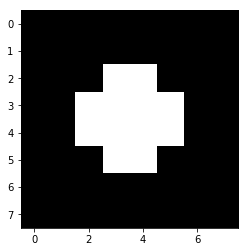

In [7]:
plt.figure()
plt.imshow(im_1, cmap='gray')
plt.show()

In [8]:
im_2 = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 1, 1, 0, 0],
                 [0, 0, 0, 0, 1, 1, 0, 0],
                 [0, 0, 1, 1, 1, 1, 0, 0],
                 [0, 0, 1, 1, 1, 1, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0]])

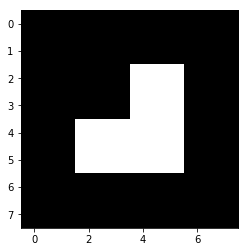

In [9]:
plt.figure()
plt.imshow(im_2, cmap='gray')
plt.show()

## Centroide

É centro de massa de uma região.

## Perimetro

Correspond ao número de pixels e borda de um objeto.

É diferente para conectividade 4 e 8.

* No caso de bordas 8-conectadas, as distâncias entre pixels adjacentes não são constantes.
    * Pares de pixelsl com vizinhança diagonal
        * $d(A, B) = \sqrt{2}$
    * Demais pares de pixels:
        * $d(B, C) = 1$

## Fecho convexo

É o menor polígono convexo que contém uma região.

In [10]:
im_3 = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 1, 1, 0, 0, 1, 1, 0],
                 [0, 1, 1, 0, 0, 1, 1, 0],
                 [0, 1, 1, 0, 0, 1, 1, 0],
                 [0, 1, 1, 1, 1, 1, 1, 0],
                 [0, 0, 1, 1, 1, 1, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0]])

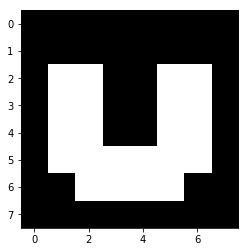

In [11]:
plt.figure()
plt.imshow(im_3, cmap='gray')
plt.show()

## Área convexa

O número de pixels na região do fecho convexo

## Circularidade

É uma função do perimetro e da área de uma forma.

$$
\text{Circularidade } = \frac{4 \times \pi \text{ Área}}{\text{Perimetro }^2} 
$$

A circularidade do circulo perfeito é 1.

## Excentricidade

Corresponde à razão entre a distância entre os focos de uma elipse e o comprimento do maior eixo.

## Diâmetro equivalente

Corresponde ao diâmetro de um circulo com a mesma área da forma.

$$\text{DiametroEquiv } = \sqrt{\frac{4 \times \text{ Área}}{\pi}}$$

## Número de Euler

É o número de regiões na imagem subtraído o número de buracos.

In [12]:
im_4 = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 1, 0, 1, 1, 1, 1, 0],
                 [0, 1, 1, 1, 0, 0, 1, 0],
                 [0, 1, 1, 1, 0, 0, 1, 0],
                 [0, 0, 1, 1, 1, 1, 1, 0],
                 [0, 0, 1, 0, 0, 1, 0, 0],
                 [0, 1, 1, 1, 1, 1, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0]])

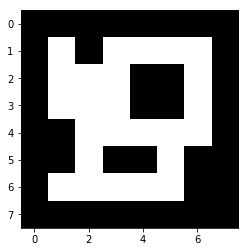

In [13]:
plt.figure()
plt.imshow(im_4, cmap='gray')
plt.show()

In [17]:
im_5 = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 1, 1, 1, 0, 0, 0, 0],
                 [0, 1, 0, 1, 0, 1, 1, 0],
                 [0, 1, 0, 1, 0, 1, 1, 1],
                 [0, 1, 1, 1, 0, 1, 0, 1],
                 [0, 1, 0, 1, 0, 1, 0, 1],
                 [0, 1, 1, 1, 0, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0]])

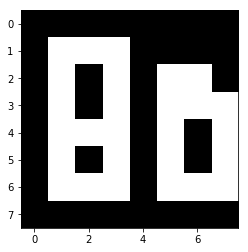

In [18]:
plt.figure()
plt.imshow(im_5, cmap='gray')
plt.show()

## Extensão

É a razão entre o número de pixels na região e no bounding box.

$${Extensão } = \frac{{Área}_{Objeto}}{{Área}_{BoundingBox}} $$

## Área preenchida

Área de uma região após o preenchimento dos buracos.

## Maior eixo

In [15]:
im_4 = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 1, 1, 1, 0],
                 [0, 0, 0, 0, 1, 1, 1, 0],
                 [0, 1, 1, 1, 0, 0, 0, 0],
                 [0, 1, 1, 1, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0]])

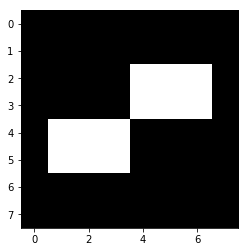

In [16]:
plt.figure()
plt.imshow(im_4, cmap='gray')
plt.show()

## Menor eixo

## Orientação

## Solidez

É a razão entre o número de pixels na região e o seu fecho convexo.

$${Solidez} = \frac{{Área}_{Objeto}}{{Área}_{Convexa}}$$

## Intensidades mínima, média e máxima

# O método regionprops

3 (720, 960, 4)
2 (720, 960) 0.0 1.0
12


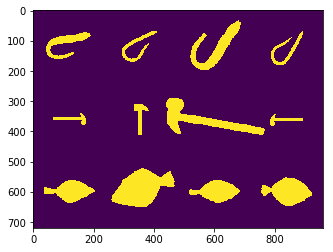

<class 'numpy.ndarray'> (0,)
-----------------------------------
Objeto:  0
-----------------------------------
Area.........................:  8376
Bounding box.................:  (34, 521, 199, 689)
Centroide....................:  (124.41833810888252, 602.6284622731614)
Area do fecho convexo........:  15016
Excentricidade...............:  0.8990705202973555
Diametro equivalente.........:  103.26981372454259
Numero de Euler..............:  1
Extensao.....................:  0.3021645021645022
Area preenchida..............:  8376
Comprimento do maior eixo....:  231.59985943580307
Intensidade maxima...........:  1.0
Intensidade media............:  1.0
Intensidade minima...........:  1.0
Comprimento do menor eixo....:  101.39530706741958
Orientacao...................:  0.7310587664385031
Perimetro....................:  763.862048458375
Solidicidade.................:  0.5578050079914758
Vetor de caracteristicas do objeto:  0
[8.37600000e+03 1.50160000e+04 8.99070520e-01 1.03269814e+02
 1.0

c:\users\joao\anaconda3\envs\sin393-py36\lib\site-packages\skimage\measure\_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
c:\users\joao\anaconda3\envs\sin393-py36\lib\site-packages\skimage\measure\_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


Perimetro....................:  291.0477272147525
Solidicidade.................:  0.47763457164518575
Vetor de caracteristicas do objeto:  7
[1.26000000e+03 2.63800000e+03 9.78788489e-01 4.00534871e+01
 1.00000000e+00 3.01435407e-01 1.26000000e+03 1.34226431e+02
 1.00000000e+00 1.00000000e+00 1.00000000e+00 2.74994200e+01
 4.22544408e-02 2.91047727e+02 4.77634572e-01]
-----------------------------------
Objeto:  8
-----------------------------------
Area.........................:  16199
Bounding box.................:  (523, 258, 652, 469)
Centroide....................:  (588.1898882647077, 358.17377615902217)
Area do fecho convexo........:  18699
Excentricidade...............:  0.8406190706133732
Diametro equivalente.........:  143.61478818410345
Numero de Euler..............:  1
Extensao.....................:  0.5951357507623352
Area preenchida..............:  16199
Comprimento do maior eixo....:  202.23278097922133
Intensidade maxima...........:  1.0
Intensidade media............:  1

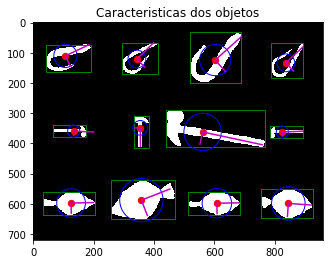

In [39]:
def plot_centroide(ax, cent):
    """
    Plota o centroide de um objeto.
    """
    ax.scatter(cent[1], cent[0], color='r', s=40)

def plot_bbox(ax, bbox):
    """
    Plota o bounding-box de um objeto.
    """
    ax.add_patch( 
        patches.Rectangle( (bbox[1]-1., bbox[0]-1.), bbox[3]-bbox[1]+1, bbox[2]-bbox[0]+1,
                            fill=False, color='g')
    )
    
def plot_diametro(ax, cent, diam):
    """
    Plota o diametro de um objeto.
    """
    ax.add_patch( 
        patches.Circle( (cent[1], cent[0]), radius=diam/2., fill=False, color='b')
    )
    
def plot_rotulo(ax, bbox, label):
    x_ = bbox[1]
    y_ = bbox[0]
    ax.annotate(label, xy=(x_, y_), xytext=(x_-1, y_-1), color='y' )
    
def plot_eixo_menor(ax, cent, orient, maj_ax):
    x_ = np.sin(orient)*(maj_ax*0.5)
    y_ = np.cos(orient)*(maj_ax*0.5)
    ax.plot([cent[1], cent[1]+x_] ,[cent[0], cent[0]+y_], 'm-')
    
def plot_eixo_maior(ax, cent, orient, maj_ax):
    x_ = np.cos(orient)*(maj_ax*0.5)
    y_ = np.sin(orient)*(maj_ax*0.5)
    ax.plot([cent[1], cent[1]+x_] ,[cent[0], cent[0]-y_], 'm-')    

im = imageio.imread('mpeg7_shapes_3.png')
print(im.ndim, im.shape)
im = im[:,:,0]
im = img_as_float(im)
im = (im > 0.5).astype(float)
print(im.ndim, im.shape, im.min(), im.max())

# Gera imagem de rotulos.
im_r = measure.label(im)
print(im_r.max())

plt.figure()
plt.imshow(im)
plt.show()

# Inicializa matriz de caracteristicas F.
X = np.array([])
print(type(X), X.shape)

# Obtem propriedades (caracteriticas) de regioes rotuladas em uma imagem.
props = measure.regionprops(im_r, im)

# Percorre os objetos.
for i in range(im_r.max()):
    print('-----------------------------------')
    print('Objeto: ', i)
    print('-----------------------------------')
    print('Area.........................: ', props[i].area)
    print('Bounding box.................: ', props[i].bbox)
    print('Centroide....................: ', props[i].centroid)
    print('Area do fecho convexo........: ', props[i].convex_area)
    print('Excentricidade...............: ', props[i].eccentricity)
    print('Diametro equivalente.........: ', props[i].equivalent_diameter)
    print('Numero de Euler..............: ', props[i].euler_number)
    print('Extensao.....................: ', props[i].extent)
    print('Area preenchida..............: ', props[i].filled_area)
    print('Comprimento do maior eixo....: ', props[i].major_axis_length)
    print('Intensidade maxima...........: ', props[i].max_intensity)
    print('Intensidade media............: ', props[i].mean_intensity)
    print('Intensidade minima...........: ', props[i].min_intensity)
    print('Comprimento do menor eixo....: ', props[i].minor_axis_length)
    print('Orientacao...................: ', props[i].orientation)
    print('Perimetro....................: ', props[i].perimeter)
    print('Solidicidade.................: ', props[i].solidity)
    
    # Constroi ndarray do objeto i
    X_i = np.array( [props[i].area, 
                     props[i].convex_area, 
                     props[i].eccentricity,
                     props[i].equivalent_diameter, 
                     props[i].euler_number,
                     props[i].extent, 
                     props[i].filled_area,
                     props[i].major_axis_length,
                     props[i].max_intensity,
                     props[i].mean_intensity,
                     props[i].min_intensity,
                     props[i].minor_axis_length,
                     props[i].orientation,
                     props[i].perimeter, 
                     props[i].solidity]  ) 
    # TESTE
    print('Vetor de caracteristicas do objeto: ', i)
    print(X_i)
    
    # Justa os vetores e carac. na matriz de caract. F
    if i==0:
        X = X_i
    else:
        X = np.vstack((X, X_i))
        

# Imprime na tela.
print(X.shape)
print(X)

# Grava em arquivo.
np.savetxt('MPEG7_shapes_3.csv', X, delimiter=' , ', fmt='%.4f')

# Plota algumas caracteristicas sobre a imagem original.
plt.figure()
plt.title('Caracteristicas dos objetos')
plt.imshow(im, cmap='gray', interpolation='nearest')
ax = plt.gca() # Get the current axes
# Percorre os objetos.
for i in range(im_r.max()):
    # Plota o centroide.
    plot_centroide(ax, props[i].centroid)
    # Plota o Bounding Box
    plot_bbox(ax, props[i].bbox)
    # Plota o diametro.
    plot_diametro(ax, props[i].centroid, props[i].equivalent_diameter)
    # Plota o eixo maior.
    plot_eixo_maior(ax, props[i].centroid, props[i].orientation, props[i].major_axis_length)
    # Plota o eixo menor
    plot_eixo_menor(ax, props[i].centroid, props[i].orientation, props[i].minor_axis_length)

plt.show()

## Visualização das caracteristicas 2D

In [ ]:

f = ['area', 'convex_area', 'eccentricity', 'equivalent_diameter', 'euler_number',
     extent, filled_area, major_axis_length, mean_intensity, min_intensity,                      minor_axis_length,
                     props[i].orientation,
                     props[i].perimeter, 
                     props[i].solidity]

num_classes = len(np.unique(y))
num_feat = X.shape[1]

In [ ]:
cores = ['r', 'g', 'b']
fig, axes = plt.subplots(num_feat, num_feat, figsize=(16,16))
for i in range(num_feat):
    for j in range(num_feat):
        if i==j: # Nome da caracteristica
            axes[i,j].text(0.1, 0.5, f[i])
            axes[i,j].axis('off')
        else: # Plot
            for k in range(num_classes):
                axes[i,j].scatter(X[y==k, i], X[y==k, j], color=cores[k], s=24, edgecolors='k')
            axes[i,j].axis('equal')
plt.show()